# Machine Learning Project - Churn
### Roberto Colangelo, Davide Rosatelli, Marco Creti, Anastasia Picchia

## Introduction 
Understanding and predicting customers’ behaviours has become more and more meaningful and essential in nowadays businesses. If until a few decades ago it was unconceivable thinking that a machine could predict whether a customer would churn or not, nowadays, thanks to the advances in technology and computing power, Artificial Intelligence and Machine Learning models this has become much more than feasible. Dealing with such kind of tasks is important for data scientists that wants to improve their skills and, therefore, as project for our “Machine Learning” course, we chose to perform a data analysis on the churn dataset of a bank, with the aim of predicting whether the customers' accounts are active or closed. In order to solve such machine learning task, we experimented different models and compared their outputs to identify which methods would guarantee the best results. 

## Data and libraries importation

In [48]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import keras 
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import svm
from sklearn import ensemble
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential
from sklearn.decomposition import PCA

In [49]:
df=pd.read_csv('churn.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,15476,117,7.42
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,8764,69,8.31
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,10291,60,0.00
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,8395,62,0.00


In [50]:
#Statistical insights on the dataset 
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,4404.086304,64.858695,4.018332
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,3397.129254,23.472570,4.490251
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,2155.500000,45.000000,0.060000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,3899.000000,67.000000,2.120000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,4741.000000,81.000000,7.430000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,16.390000


In [51]:
#Data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Data Exploration/Visualization

In [52]:
#gender piechart
pie=df.groupby('Gender').size().to_frame('count').reset_index()
fig1= px.pie(pie, values='count', names='Gender', title='Customers by gender',color_discrete_map={
                                'M':'royalblue',
                                 'F':'pink'},color='Gender')
fig1.update_traces(hoverinfo = 'label+percent', textfont_size = 12,
                  textinfo = 'label+percent', pull = [ 0.1])
fig1.show()
# This is an interactive graph, if you click on the points in the legend you can remove or add the groups
#Pretty balanced customer stes by gender 47.1% males vs 52.9% females

In [53]:
dftr=df.groupby('Education_Level').mean().sort_values(by='Total_Trans_Amt').reset_index()
dftr=dftr[dftr['Education_Level']!='Unknown']
fig= px.bar(dftr, x = 'Education_Level' , y = 'Total_Trans_Amt', color = 'Total_Trans_Amt', title = 'Total year transaction amount by education level',text_auto=True, color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.update_layout(xaxis_tickangle=0, xaxis_title = 'Educational level')
fig.update_layout(uniformtext_minsize=0.4)
fig.update_yaxes(range=[4000, 4600])
fig.show()
#Surprisingly people who spend less are those in the top educational tier (Doctorate) while those are the second to spend the highest amount of money 

In [54]:
dfmarried=df[df['Marital_Status']!='Unknown']
dfmarried=dfmarried.groupby('Marital_Status').mean().sort_values(by='Total_Trans_Amt',ascending=False).reset_index()
marital= px.bar(dfmarried, x = 'Marital_Status' , y = 'Total_Trans_Amt', color = 'Marital_Status', title = 'Total year transaction amount by marital status',text_auto=True)
marital.update_layout(xaxis_tickangle=0, xaxis_title = 'Marital_Status')
marital.update_layout(uniformtext_minsize=0.4)
marital.update_yaxes(range=[4000, 4600])
marital.show()
#Singles are the ones who spend the highest amount of money, while married the least (probably because they are controlled by their partner or are saving for their children future expenses) 

In [55]:
dfscatter=df[df['Income_Category']!='Unknown']
incomelevel={"Less than $40K":1,"$40K - $60K":2, "$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
dfscatter['Income_Category']=dfscatter['Income_Category'].replace(incomelevel)
scatter=px.box(dfscatter,x='Income_Category',y='Credit_Limit',color='Income_Category',title = 'Income category vs credit limit')
scatter.show()
# It shows that the credit limit is highly correlated with the income category (Increasing value going from the lowest to highest category) 

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_2324/1306768844.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
violin=px.violin(df, x = 'Card_Category' , y = 'Avg_Utilization_Ratio', color = 'Card_Category', title = 'Average utilization vs Card Category')
violin.show()
# Unexpectedly those with platinum and gold cards use cards much less than those with blue and silver cards. 

## Dashboard

Here we have an interactive dashboard that we created for visualization purposes.\
The first graph is a scatterplot of 'Transaction_Amount' plotted against 'Credit_Limit' where the color is represented by the 'Card_Category' that can be filtered thorugh the dropdown menu and the symbol is represented by the 'Income_Category' that can be filtered with a slider.\
The second graph is again a scatter plot plotting 'Avg_Utilitization_Ratio' of the cards vs 'Customer_Age' where the color is represented by the 'Education_Level' that can be filtered with a slider.

In [57]:
## Preparing data for the dashboard 
dfdash=df[df['Card_Category']!='Unknown']
dfdash=dfdash[dfdash['Income_Category']!='Unknown']
# cardlevel={'Blue':1,'Silver':2, 'Gold':3,'Platinum':4}
# dfdash['Card_Category']=dfdash['Card_Category'].replace(cardlevel)
incomelevel={"Less than $40K":1,"$40K - $60K":2, "$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
dfdash['Income_Category']=df['Income_Category'].replace(incomelevel)
Cardcat=dfdash['Card_Category'].unique().tolist()
# Cardcat.sort()
IncomeCat=dfdash['Income_Category'].unique().tolist()
IncomeCat.sort()
dfdash=dfdash[dfdash['Education_Level']!='Unknown']
mapper={'Uneducated':1,'High School':2, 'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
dfdash['Education_Level']=dfdash['Education_Level'].replace(mapper)
Edulevel=dfdash['Education_Level'].unique().tolist()
Edulevel.sort()

In [58]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] 
app = JupyterDash(__name__, external_stylesheets = external_stylesheets)

In [59]:
app.layout = html.Div([
		html.Div([
				html.Div([
						html.P( "Filter by Income Category :", className = "control_label"),
						dcc.RangeSlider(id = "erlider",
							            min = 1,
							            max = 4,
							            value = [1, 4],
							            className = "dcc_control"),
						html.P("Filter by Card Category:", className = "control_label"),
						dcc.Dropdown(   id = "Card",
                                        options =[{'label':Cardcat[0],'value':'Blue'},
										{'label':Cardcat[1],'value':'Silver'},
										{'label':Cardcat[2],'value':'Gold'},
										{'label':Cardcat[3],'value':'Platinum'}],
                                        multi = True,
                                        value = ['Blue', 'Silver','Gold','PLatinum'],
                                        className = "dcc_control")
					],
					className = "pretty_container four columns",
					id = "cross-filter-options",
				),
				html.Div(   [dcc.Graph(id = "graph")],
                            id = "countGraphContainer",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		),
		html.Div([
				html.Div([
						html.P( "Filter by Education Level:", className = "control_label"),
						dcc.RangeSlider(id = "slider",
							            min = 1,
							            max = 6,
							            value = [1, 6],
										marks={
											1:'Uneducated',
											2:'High School',
											3:'College',
											4:'Graduate',
											5:'Post-Graduate',
											6:'Doctorate',
										},
							            className = "dcc_control"),    
					],
					className = "pretty_container four columns",
					id = "crosfilt",
				),
				html.Div(   [dcc.Graph(id = "grafico")],
                            id = "grafico2",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		),
		
],
	id="mainContainer",
	style={"display": "flex", "flex-direction": "column"}
)

In [60]:
@app.callback(	Output("graph", "figure"),[Input("erlider", "value"),Input('Card','value')])
def scatter(inco,card):
    temp=dfdash[dfdash['Card_Category'].isin(card)]
    temp=temp[temp['Income_Category'].isin(list(range(inco[0],inco[-1]+1)))]
    fig= px.scatter(temp, x="Total_Trans_Amt", y="Credit_Limit",symbol="Income_Category",color='Card_Category',title='Total Transaction amonut vs credit limit')
    return fig

In [61]:
@app.callback(	Output("grafico", "figure"),	Input("slider", "value"))
def scatter(Education):
    temp2=dfdash[dfdash['Education_Level'].isin(list(range(Education[0],Education[-1]+1)))]
    fig= px.scatter(temp2, x="Avg_Utilization_Ratio",y= 'Customer_Age',color='Education_Level',title='Avg utilization ratio of card vs Customer Age', color_continuous_scale=px.colors.sequential.Sunsetdark)
    return fig

In [62]:
app.run_server(mode='inline')

## Data Pre-Processing and Cleaning

In [63]:
#Removing missing values 
df=df[df['Education_Level']!='Unknown']
df=df[df['Income_Category']!='Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7641 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7641 non-null   int64  
 1   Attrition_Flag            7641 non-null   object 
 2   Customer_Age              7641 non-null   int64  
 3   Gender                    7641 non-null   object 
 4   Dependent_count           7641 non-null   int64  
 5   Education_Level           7641 non-null   object 
 6   Marital_Status            7641 non-null   object 
 7   Income_Category           7641 non-null   object 
 8   Card_Category             7641 non-null   object 
 9   Months_on_book            7641 non-null   int64  
 10  Total_Relationship_Count  7641 non-null   int64  
 11  Months_Inactive_12_mon    7641 non-null   int64  
 12  Contacts_Count_12_mon     7641 non-null   int64  
 13  Credit_Limit              7641 non-null   float64
 14  Total_T

In [64]:
#OneHotEncoding the 'Gender' column as a dummy variable
df=pd.get_dummies(df, columns=['Gender'])
print(df.Education_Level.unique())
#Ordinal encoding on the 'Education_Level' column
mapper={'Uneducated':1,'High School':2, 'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
df['Education_Level']=df['Education_Level'].replace(mapper)
df[df['Education_Level']=='Unknown']
#Ordinal encoding on the 'Income_Category' column
print(df['Income_Category'].unique()) 
incomelevel={"Less than $40K":1,"$40K - $60K":2, "$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
df['Income_Category']=df['Income_Category'].replace(incomelevel)
#Ordinal encoding on the 'Card_Category' column
print(df['Card_Category'].unique() )
cardlevel={'Blue':1,'Silver':2, 'Gold':3,'Platinum':4}
df['Card_Category']=df['Card_Category'].replace(cardlevel)

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Silver' 'Gold' 'Platinum']


In [65]:
#Selecting target and input variables 
y=df['Attrition_Flag']
x=df.iloc[:,2:]

In [66]:
#Dropping marital status--> doesn't seem relevant 
x=x.drop('Marital_Status',axis=1)
Churn={'Existing Customer':0,'Attrited Customer':1} 

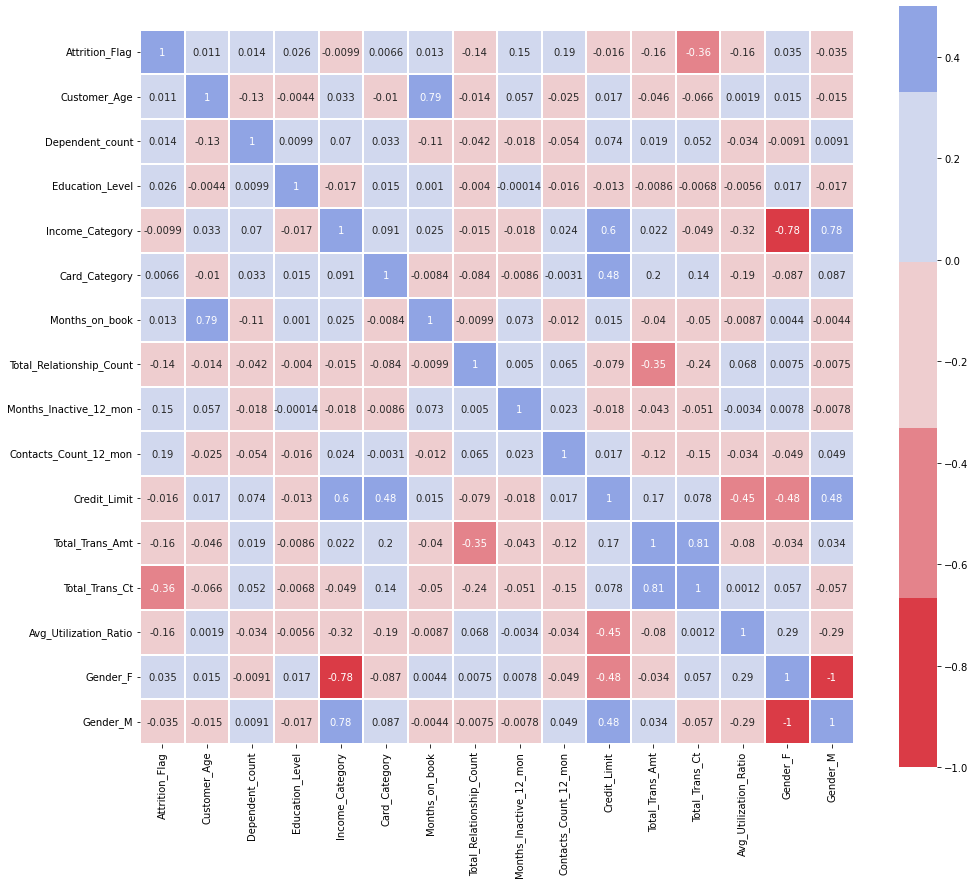

In [67]:
# Plotting correlation matrix
dfcorr=df.copy()
dfcorr['Attrition_Flag']=df['Attrition_Flag'].replace(Churn)
corr=dfcorr.iloc[:,1:].corr()
plt.figure(figsize=(16, 14))
cmap=sns.diverging_palette(10,260)
sns.heatmap(corr, vmax=0.5, center=0,square=True, linewidths=2, cmap=cmap,annot=True)
plt.show()
# Later we will use only a subset of variables, the ones more correlated with the target

## Modelling

In [68]:
scaler = StandardScaler() #Importing standard scaler to scale data
scaled_data = scaler.fit_transform(x)

In [69]:
#Creating a dictionary for storing results of each model 
results=dict()

### Baseline Model - Logistic Regression with all variables

Predictor - Training :  (5730, 15) Predictor - Testing :  (1911, 15)
Accuracy of the model is: 0.8670852956567242


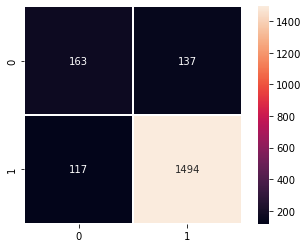

In [70]:
scaler = StandardScaler() #Importing standard scaler to scale data
scaled_data = scaler.fit_transform(x)
X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, y, test_size=.25, random_state=12)
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
baseline=GaussianNB()
baseline=baseline.fit(X_train,y_train)
predictions=baseline.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acclog=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acclog))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
#Recall tp /tp+fn
#Model missclassifies a lot of not churning customers
results['Logistic regression']=acclog

### Support Vector Machine classifier

### Grid search

In [71]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
# # fitting the model for grid search
# grid.fit(X_train, y_train)
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

From Gridsearch it appears that the best combination of parameters is this one 

Accuracy of the model is: 0.9256933542647828


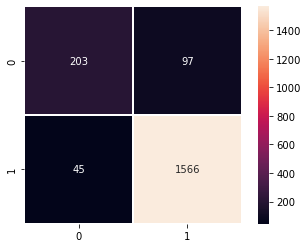

In [72]:
SVMclass=svm.SVC(C=100,gamma=0.01,kernel='rbf')
SVMclass=SVMclass.fit(X_train,y_train)
predictions=SVMclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accsvm=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accsvm))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results['SVM ']=accsvm

### Decision Tree

In [73]:
#Finding optimal depth and then inserting it into the Decision tree 
accuracy_vs_depth ={}
depth = 5
prof=1
for i in range(1, depth+1):
    treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
    treeclass=treeclass.fit(X_train,y_train)    
    train_accuracy = treeclass.score(X_test, y_test)
    accuracy_vs_depth[prof]=[train_accuracy]
    prof+=1
optimal=max(accuracy_vs_depth,key=accuracy_vs_depth.get)
print('Optimal depth is: '+str(optimal))

Optimal depth is: 1


Accuracy of the model is: 0.8430141287284144


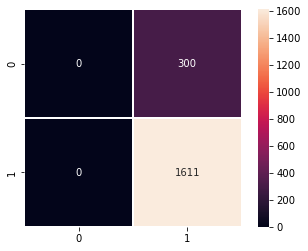

In [74]:
treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=optimal)
treeclass=treeclass.fit(X_train,y_train)
predictions=treeclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acctree=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acctree))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results['Decision Tree']=acctree

### Ensemble models

### Boosting

[16:17:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/Machine_L/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy of the model is: 0.9529042386185244


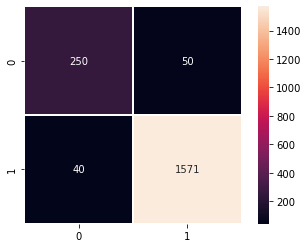

In [75]:
XGBclass = XGBClassifier()
XGBclass=XGBclass.fit(X_train,y_train)
predictions=XGBclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accboost=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accboost))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results['Boosting']=accboost

### Random Forest

Accuracy of the model is: 0.9513343799058085


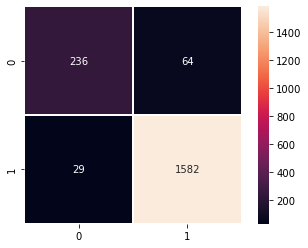

In [76]:
randomforest=RandomForestClassifier()
randomforest=randomforest.fit(X_train,y_train)
predictions=randomforest.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accrf=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accrf))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results['Random Forest']=accrf

### Neural networks

### Neural Network 1

In [77]:
#Preparing data to be outputted by NN
y_train=y_train.replace(Churn)
y_test=y_test.replace(Churn)
#Structure of the first NN: Dense (240 neurons),Dropout (10%),Dense(120 neurons),Dense
Nn1= Sequential()
Nn1.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dropout(0.1,seed=12))
Nn1.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn1.fit(X_train, y_train, batch_size = 60, epochs = 40)
scores = Nn1.evaluate(X_test, y_test, verbose=0)
results['Nn1']=scores[1]

Epoch 1/40


2022-05-14 16:17:54.742464: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-14 16:17:54.810222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


96/96 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8123
Epoch 2/40
96/96 [==============================] - 0s 979us/step - loss: 0.2947 - accuracy: 0.8676
Epoch 3/40
96/96 [==============================] - 0s 996us/step - loss: 0.2557 - accuracy: 0.8928
Epoch 4/40
96/96 [==============================] - 0s 959us/step - loss: 0.2175 - accuracy: 0.9106
Epoch 5/40
96/96 [==============================] - 0s 975us/step - loss: 0.2144 - accuracy: 0.9129
Epoch 6/40
96/96 [==============================] - 0s 982us/step - loss: 0.2035 - accuracy: 0.9192
Epoch 7/40
96/96 [==============================] - 0s 999us/step - loss: 0.2000 - accuracy: 0.9221
Epoch 8/40
96/96 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9186
Epoch 9/40
96/96 [==============================] - 0s 965us/step - loss: 0.2019 - accuracy: 0.9209
Epoch 10/40
96/96 [==============================] - 0s 980us/step - loss: 0.1885 - accuracy: 0.9221
Epoch 11/40
96

### Neural Network 2

In [78]:
#Structure of the second NN: Dense(120 neurons),Dense(60 neurons),Dense
Nn2= Sequential()
Nn2.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn2.fit(X_train, y_train, batch_size = 60, epochs = 140)
scores = Nn2.evaluate(X_test, y_test, verbose=0)
results['Nn2']=scores[1]

Epoch 1/140
96/96 [==============================] - 0s 636us/step - loss: 0.4933 - accuracy: 0.8213
Epoch 2/140
96/96 [==============================] - 0s 567us/step - loss: 0.3018 - accuracy: 0.8542
Epoch 3/140
96/96 [==============================] - 0s 555us/step - loss: 0.2735 - accuracy: 0.8843
Epoch 4/140
96/96 [==============================] - 0s 555us/step - loss: 0.2509 - accuracy: 0.9026
Epoch 5/140
96/96 [==============================] - 0s 560us/step - loss: 0.2353 - accuracy: 0.9034
Epoch 6/140
96/96 [==============================] - 0s 554us/step - loss: 0.2237 - accuracy: 0.9106
Epoch 7/140
96/96 [==============================] - 0s 564us/step - loss: 0.2166 - accuracy: 0.9074
Epoch 8/140
96/96 [==============================] - 0s 558us/step - loss: 0.2196 - accuracy: 0.9114
Epoch 9/140
96/96 [==============================] - 0s 558us/step - loss: 0.2222 - accuracy: 0.9096
Epoch 10/140
96/96 [==============================] - 0s 553us/step - loss: 0.2052 - accura

### Neural Network 3

In [79]:
#Structure of the third NN: Dense(520 neurons),Dense(520 neurons),Dense
Nn3 = Sequential()
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn3.fit(X_train, y_train, batch_size = 60, epochs = 60)
scores = Nn3.evaluate(X_test, y_test, verbose=0)
results['Nn3']=scores[1]

Epoch 1/60
96/96 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8102
Epoch 2/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2513 - accuracy: 0.8993
Epoch 3/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9129
Epoch 4/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9143
Epoch 5/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9242
Epoch 6/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9153
Epoch 7/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9251
Epoch 8/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9191
Epoch 9/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9257
Epoch 10/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9299
Epoch 11/60
96/96 [

## Results

In [80]:
models = list(results.keys())
accuracies = list(results.values())
finalplot=px.scatter(x=models,y=accuracies,title='Comparison of accuracies for each model trained on all the dataset')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Models',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()
#Boosting is the best together with RandomForest

## Variables subset

In [81]:
x_reduced =x.drop(['Income_Category', 'Card_Category', 'Months_on_book', 'Customer_Age', 'Education_Level', 'Dependent_count', 'Credit_Limit', 'Gender_F', 'Gender_M'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_reduced)
results_sub=dict()

### Logistic Regression

Predictor - Training :  (5730, 6) Predictor - Testing :  (1911, 6)
Accuracy of the model is: 0.8534798534798534


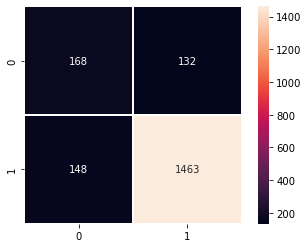

In [82]:
X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, y, test_size=.25, random_state=12)
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
baseline=GaussianNB()
baseline=baseline.fit(X_train,y_train)
predictions=baseline.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acclog=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acclog))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
#Recall tp /tp+fn
#Model missclassifies a lot of not churning customers
results_sub['Logistic regression']=acclog

### Support Vector Machine

### Grid search

In [83]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
# # fitting the model for grid search
# grid.fit(X_train, y_train)
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

Accuracy of the model is: 0.9173207744636316


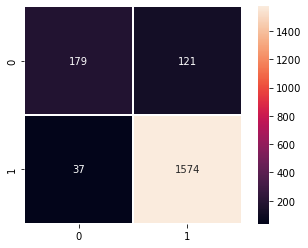

In [84]:
SVMclass=svm.SVC(C=100,gamma=0.01,kernel='rbf')
SVMclass=SVMclass.fit(X_train,y_train)
predictions=SVMclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accsvm=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accsvm))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results_sub['SVM ']=accsvm

### Decision Tree

In [85]:
#Finding optimal depth and then inserting it into the Decision tree
accuracy_vs_depth ={}
depth = 5
prof=1
for i in range(1, depth+1):
    treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
    treeclass=treeclass.fit(X_train,y_train)    
    train_accuracy = treeclass.score(X_test, y_test)
    accuracy_vs_depth[prof]=[train_accuracy]
    prof+=1
optimal=max(accuracy_vs_depth,key=accuracy_vs_depth.get)
print('Optimal depth is: '+str(optimal))


Optimal depth is: 1


Accuracy of the model is: 0.8430141287284144


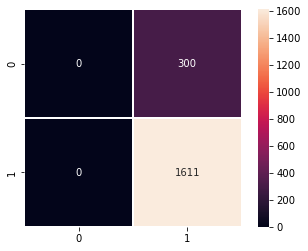

In [86]:
treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=optimal)
treeclass=treeclass.fit(X_train,y_train)
predictions=treeclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acctree=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acctree))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results_sub['Decision Tree']=acctree

### Ensemble models

### Boosting

[16:18:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/Machine_L/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy of the model is: 0.9387755102040817


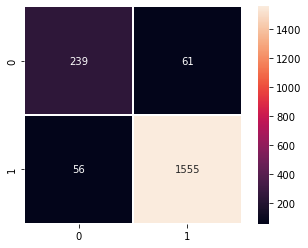

In [87]:
XGBclass = XGBClassifier()
XGBclass=XGBclass.fit(X_train,y_train)
predictions=XGBclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accboost=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accboost))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results_sub['Boosting']=accboost

### Random Forest

Accuracy of the model is: 0.9419152276295133


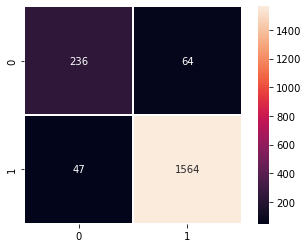

In [88]:
randomforest=RandomForestClassifier()
randomforest=randomforest.fit(X_train,y_train)
predictions=randomforest.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accrf=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accrf))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
results_sub['Random Forest']=accrf

### Neural Networks
### Neural Network 1

In [89]:
#Data for NN output
y_train=y_train.replace(Churn)
y_test=y_test.replace(Churn)
Nn1= Sequential()
#Structure of the first NN : Dense,Dropout,Dense,Dense
Nn1.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dropout(0.1,seed=12))
Nn1.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn1.fit(X_train, y_train, batch_size = 60, epochs = 40)
scores = Nn1.evaluate(X_test, y_test, verbose=0)
results_sub['Nn1']=scores[1]


Epoch 1/40
96/96 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.8434
Epoch 2/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8807
Epoch 3/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.8923
Epoch 4/40
96/96 [==============================] - 0s 999us/step - loss: 0.2296 - accuracy: 0.9040
Epoch 5/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.8919
Epoch 6/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9006
Epoch 7/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9098
Epoch 8/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.8993
Epoch 9/40
96/96 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9012
Epoch 10/40
96/96 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9104
Epoch 11/40
96/96

### Neural Network 2

In [90]:
#Structure of the second NN: Dense(120 neurons),Dense(60 neurons),Dense
Nn2= Sequential()
Nn2.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn2.fit(X_train, y_train, batch_size = 60, epochs = 140)
scores = Nn2.evaluate(X_test, y_test, verbose=0)
results_sub['Nn2']=scores[1]

Epoch 1/140
96/96 [==============================] - 0s 702us/step - loss: 0.5108 - accuracy: 0.8287
Epoch 2/140
96/96 [==============================] - 0s 621us/step - loss: 0.2883 - accuracy: 0.8773
Epoch 3/140
96/96 [==============================] - 0s 631us/step - loss: 0.2627 - accuracy: 0.8829
Epoch 4/140
96/96 [==============================] - 0s 619us/step - loss: 0.2587 - accuracy: 0.8863
Epoch 5/140
96/96 [==============================] - 0s 602us/step - loss: 0.2448 - accuracy: 0.8939
Epoch 6/140
96/96 [==============================] - 0s 625us/step - loss: 0.2492 - accuracy: 0.8896
Epoch 7/140
96/96 [==============================] - 0s 595us/step - loss: 0.2365 - accuracy: 0.8963
Epoch 8/140
96/96 [==============================] - 0s 617us/step - loss: 0.2278 - accuracy: 0.9068
Epoch 9/140
96/96 [==============================] - 0s 611us/step - loss: 0.2351 - accuracy: 0.8974
Epoch 10/140
96/96 [==============================] - 0s 596us/step - loss: 0.2249 - accura

### Neural Network 3

In [91]:
#Structure of the third NN: Dense(520 neurons),Dense(520 neurons),Dense
Nn3 = Sequential()
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn3.fit(X_train, y_train, batch_size = 60, epochs = 60)
scores = Nn3.evaluate(X_test, y_test, verbose=0)
results_sub['Nn3']=scores[1]

Epoch 1/60
96/96 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8370
Epoch 2/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.8941
Epoch 3/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.8949
Epoch 4/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9035
Epoch 5/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9072
Epoch 6/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9110
Epoch 7/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9151
Epoch 8/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9169
Epoch 9/60
96/96 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9147
Epoch 10/60
96/96 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9151
Epoch 11/60
96/96 [

In [92]:
models = list(results.keys())
accuracies = list(results_sub.values())
finalplot=px.scatter(x=models,y=accuracies,title="Comparison of accuracies for each model trained on a variables' subset")
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Models',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()
#RandomForest is the best together with NN1 (RF is a bit more accurate)

# PCA

In [93]:
#Creating principal components
pca = PCA()
principalComponents = pca.fit_transform(x)

In [94]:
# Visualizing principal components
principalComponents

array([[ 3.87513936e+03, -3.57180306e+03,  3.59655876e+00, ...,
         3.39453105e-01, -1.10965156e-01,  6.58379582e-16],
       [-5.36389798e+02, -3.09304031e+03,  1.45603654e+01, ...,
        -6.69018534e-02, -1.47378702e-01, -2.92724703e-16],
       [-5.31615197e+03, -2.13637793e+03,  3.15287092e+01, ...,
        -8.38736216e-02,  1.89311448e-01, -3.71220259e-16],
       ...,
       [-2.70118740e+03,  6.09495318e+03,  3.82429710e+01, ...,
        -3.53351408e-01, -1.44251665e-01,  7.52115593e-17],
       [-2.97085783e+03,  4.21391237e+03,  2.47939791e+01, ...,
         5.24155104e-01, -1.01646205e-01,  1.54222537e-17],
       [ 2.26404671e+03,  5.72497013e+03,  3.57599084e+01, ...,
        -1.94747721e-01,  7.15765820e-01,  3.13842366e-17]])

In [95]:
#Plotting variabilty explained by the component vs number of components to use the elbow method and choose optimal number of components
PC = range(1, pca.n_components_+1)
plotpca=px.bar(x=PC,y= pca.explained_variance_ratio_)
plotpca.update_layout(xaxis_title='# of components',yaxis_title='Variability explained by the component')
plotpca.show()
#Elbow method not really needed here.....We just need 2 components 

In [96]:
princomp=principalComponents[:,:2]
scaler = StandardScaler() #Importing standard scaler to scale data
pca_scaled = scaler.fit_transform(princomp)

In [97]:
#Creating dictionary to store results of models
resultspca={}

## Baseline Model - Logistic regression

Predictor - Training :  (5730, 2) Predictor - Testing :  (1911, 2)
Accuracy of the model is: 0.8430141287284144


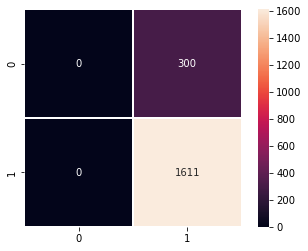

In [98]:
scaler = StandardScaler() #Importing standard scaler to scale data
scaled_data = scaler.fit_transform(x)
X_train, X_test, y_train, y_test  =   train_test_split(pca_scaled, y, test_size=.25, random_state=12)
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
baseline=GaussianNB()
baseline=baseline.fit(X_train,y_train)
predictions=baseline.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acclog=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acclog))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
#Recall tp /tp+fn
#Model missclassifies a lot of not churning customers
resultspca['Logistic regression']=acclog

## Support Vector Machine Classifier

### Grid search

In [99]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
# # fitting the model for grid search
# grid.fit(X_train, y_train)
# print best parameter after tuning

# Takes a while to compute the best parameters
# print(grid.best_params_)
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

Accuracy of the model is: 0.8733647305075877


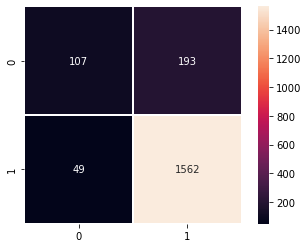

In [100]:
SVMclass=svm.SVC(C=1000,gamma=1,kernel='rbf')
SVMclass=SVMclass.fit(X_train,y_train)
predictions=SVMclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accsvm=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accsvm))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
resultspca['SVM ']=accsvm

## Decision Tree Classifier

In [101]:
#Finding optimal depth and then inserting it into the Decision tree accuracy_vs_depth ={}
depth = 5
prof=1
for i in range(1, depth+1):
    treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best')
    treeclass=treeclass.fit(X_train,y_train)    
    train_accuracy = treeclass.score(X_test, y_test)
    accuracy_vs_depth[prof]=[train_accuracy]
    prof+=1
optimal=max(accuracy_vs_depth,key=accuracy_vs_depth.get)
print('Optimal depth is: '+str(optimal))

Optimal depth is: 1


Accuracy of the model is: 0.8430141287284144


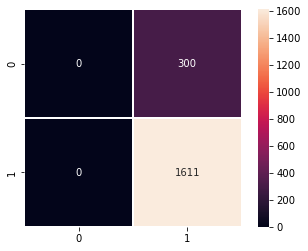

In [102]:
treeclass = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=optimal)
treeclass=treeclass.fit(X_train,y_train)
predictions=treeclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
acctree=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(acctree))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
resultspca['Decision Tree']=acctree

## Ensemble models

### Boosting

[16:18:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/Machine_L/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy of the model is: 0.8655154369440083


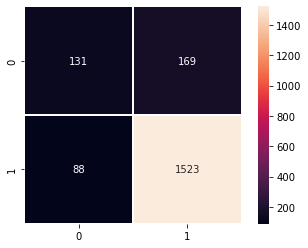

In [103]:
XGBclass = XGBClassifier()
XGBclass=XGBclass.fit(X_train,y_train)
predictions=XGBclass.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accboost=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accboost))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
resultspca['Boosting']=accboost

### Random Forest Classifier

Accuracy of the model is: 0.8649921507064364


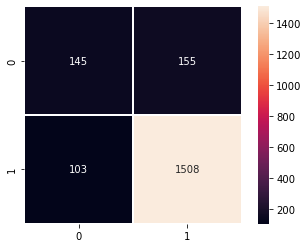

In [104]:
randomforest=RandomForestClassifier()
randomforest=randomforest.fit(X_train,y_train)
predictions=randomforest.predict(X_test)
#Analyze accuracy of predictions
conf=sklearn.metrics.confusion_matrix(y_test,predictions)
accrf=sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy of the model is: ' +str(accrf))
sns.heatmap(conf,square=True, linewidths=2,annot=True,fmt="d")
plt.show()
resultspca['Random Forest']=accrf

## Neural Networks

### Neural Network 1

In [105]:
#Data for NN output
y_train=y_train.replace(Churn)
y_test=y_test.replace(Churn)
#Structure of the first NN : Dense(240 neurons),Dropout(10%),Dense(120 neurons),Dense
Nn1= Sequential()
Nn1.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dropout(0.1,seed=12))
Nn1.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn1.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn1.fit(X_train, y_train, batch_size = 60, epochs = 40)
scores = Nn1.evaluate(X_test, y_test, verbose=0)
resultspca['Nn1']=scores[1]

Epoch 1/40
96/96 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.8193
Epoch 2/40
96/96 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8463
Epoch 3/40
96/96 [==============================] - 0s 972us/step - loss: 0.4126 - accuracy: 0.8419
Epoch 4/40
96/96 [==============================] - 0s 964us/step - loss: 0.4227 - accuracy: 0.8355
Epoch 5/40
96/96 [==============================] - 0s 925us/step - loss: 0.4138 - accuracy: 0.8360
Epoch 6/40
96/96 [==============================] - 0s 938us/step - loss: 0.4072 - accuracy: 0.8402
Epoch 7/40
96/96 [==============================] - 0s 847us/step - loss: 0.3988 - accuracy: 0.8394
Epoch 8/40
96/96 [==============================] - 0s 848us/step - loss: 0.3812 - accuracy: 0.8464
Epoch 9/40
96/96 [==============================] - 0s 870us/step - loss: 0.3889 - accuracy: 0.8395
Epoch 10/40
96/96 [==============================] - 0s 836us/step - loss: 0.3763 - accuracy: 0.8404
Epo

### Neural Network 2

In [106]:
#Structure of the second NN: Dense(120 neurons),Dense(60 neurons),Dense
Nn2= Sequential()
Nn2.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu'))
Nn2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn2.fit(X_train, y_train, batch_size = 60, epochs = 140)
scores = Nn2.evaluate(X_test, y_test, verbose=0)
resultspca['Nn2']=scores[1]

Epoch 1/140
96/96 [==============================] - 0s 715us/step - loss: 0.5616 - accuracy: 0.8098
Epoch 2/140
96/96 [==============================] - 0s 619us/step - loss: 0.4196 - accuracy: 0.8408
Epoch 3/140
96/96 [==============================] - 0s 611us/step - loss: 0.4224 - accuracy: 0.8358
Epoch 4/140
96/96 [==============================] - 0s 617us/step - loss: 0.4098 - accuracy: 0.8434
Epoch 5/140
96/96 [==============================] - 0s 622us/step - loss: 0.4096 - accuracy: 0.8450
Epoch 6/140
96/96 [==============================] - 0s 617us/step - loss: 0.4065 - accuracy: 0.8410
Epoch 7/140
96/96 [==============================] - 0s 618us/step - loss: 0.4177 - accuracy: 0.8352
Epoch 8/140
96/96 [==============================] - 0s 604us/step - loss: 0.4026 - accuracy: 0.8399
Epoch 9/140
96/96 [==============================] - 0s 631us/step - loss: 0.3897 - accuracy: 0.8434
Epoch 10/140
96/96 [==============================] - 0s 612us/step - loss: 0.3889 - accura

### Neural Network 3

In [107]:
#Structure of the third NN: Dense(520 neurons),Dense(520 neurons),Dense
Nn3 = Sequential()
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(520, kernel_initializer = 'uniform', activation = 'relu'))
Nn3.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
Nn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nn3.fit(X_train, y_train, batch_size = 60, epochs = 60)
scores = Nn3.evaluate(X_test, y_test, verbose=0)
resultspca['Nn3']=scores[1]

Epoch 1/60
96/96 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.8388
Epoch 2/60
96/96 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8371
Epoch 3/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8469
Epoch 4/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8348
Epoch 5/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8467
Epoch 6/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8384
Epoch 7/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8411
Epoch 8/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8444
Epoch 9/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8420
Epoch 10/60
96/96 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8531
Epoch 11/60
96/96 [

## Results

In [108]:
models = list(results.keys())
accuracies = list(resultspca.values())
finalplot=px.scatter(x=models,y=accuracies,title='Comparison of accuracies for each model trained on PCA')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Models',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()
# PCA doesn't seem to be useful in this case but has been performed only for studying purposes
#The best seems to be SVM probably because it adapts easily to the two orthogonal components

## Conclusion 
Our project can be concluded by stating that among the algorithms we tried, the best result is obtained by the Boosting in the first training configuration. Of course this might be due to the fact that ensemble models can improve by bagging data and computing the mean of the results obtained with the different trees implemented by the model. It was interesting seeing that neural networks were outperformed by at least one of the machine learning models in every case and this confirms the fact that in order to perform well they need huge amounts of data and only a subset of variables to work with or they will likely lead to the overfitting phenomenon. As we know deep learning is not always the best solution, especially if we are looking for a solution that is interpretable and need fewer computing resources.
Our work could be improved with more instances to work with and, in a future perspective could be adapted to online learning with continuous flow of data but this would obviously require the proper data infrastructure for storage and processing and also a constant monitoring of the performances of the models in case that bad data is fed to them. 